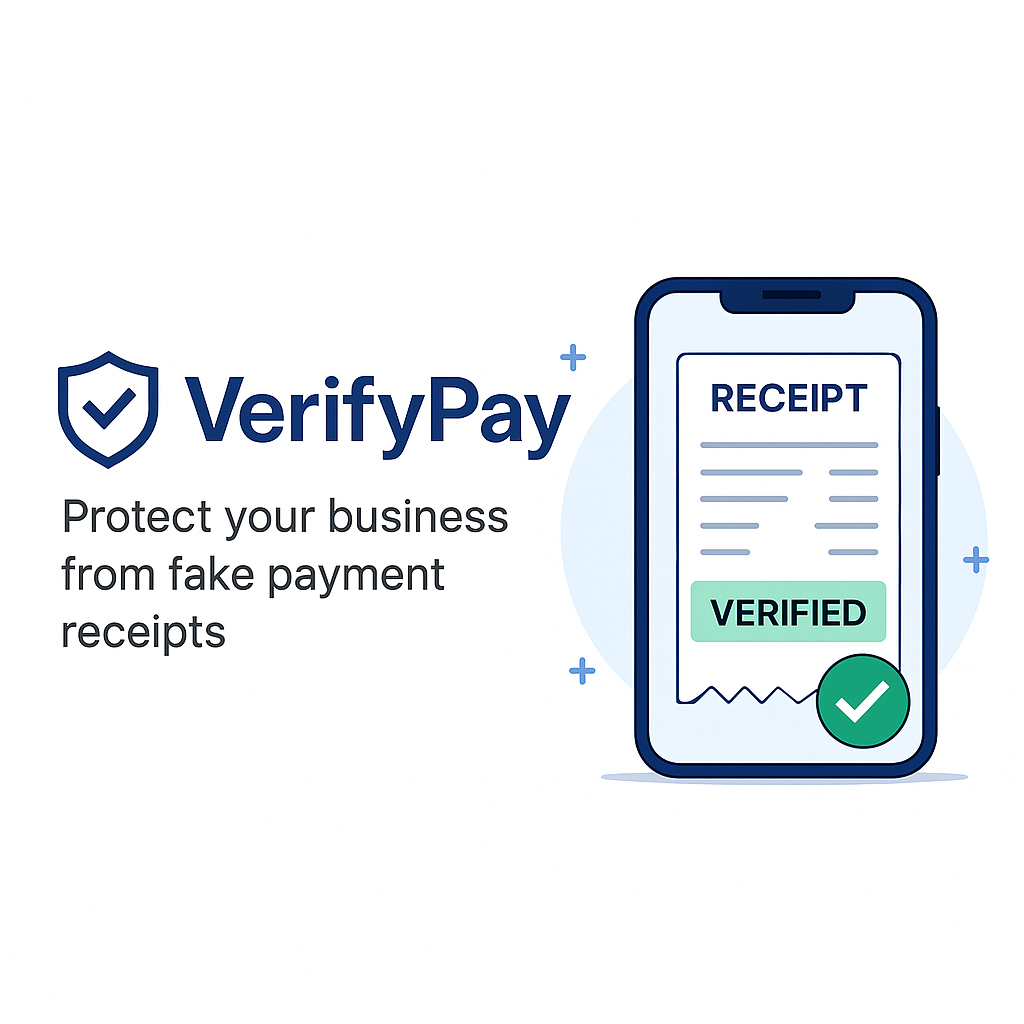

In [ ]:
# VerifyPay MVP Prototype - Receipt Verifier 🚀

In [1]:
# Install necessary packages
!pip install pytesseract opencv-python gradio openai
!apt-get install tesseract-ocr -y

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 108.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.1 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [2]:
# Imports
import pytesseract
import cv2
import gradio as gr
import re
import hashlib
import openai
from datetime import datetime
from IPython.display import HTML

In [3]:
# Set your OpenAI API Key here
openai.api_key = "Put Your API Key Here"

In [4]:
# OCR Function
def extract_text_from_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    text = pytesseract.image_to_string(gray)
    return text

In [5]:
# Parse receipt fields
def parse_receipt(text):
    amount = re.search(r'Amount: ₦?(\d+[.,]?\d*)', text)
    sender = re.search(r'Sender: (.*)', text)
    receiver = re.search(r'Receiver: (.*)', text)
    date = re.search(r'Date: (.*)', text)

    return {
        'amount': amount.group(1) if amount else 'Not Found',
        'sender': sender.group(1) if sender else 'Not Found',
        'receiver': receiver.group(1) if receiver else 'Not Found',
        'date': date.group(1) if date else 'Not Found'
    }

In [6]:
# Simulated blockchain hash registry
BLOCKCHAIN_DB = {
    hashlib.sha256(b'2025-04-12-Amount:5000000').hexdigest(): {
        "status": "registered",
        "registered_on": "2025-04-13 10:45:00"
    }
}

In [7]:
def verify_transaction(parsed_data):
    key = f"{parsed_data['date']}-Amount:{parsed_data['amount']}"
    hashed_key = hashlib.sha256(key.encode()).hexdigest()
    return BLOCKCHAIN_DB.get(hashed_key, {"status": "not found"})

In [8]:
# OpenAI LLM summary
def classify_with_llm(parsed_data):
    prompt = f"Summarize and classify this receipt:\n{parsed_data}"
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content.strip()

In [9]:
# Generate HTML report
def generate_html_report(parsed, status, llm_feedback):
    now = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    html = f'''
    <html>
    <head><title>VerifyPay Report</title></head>
    <body style="font-family:sans-serif;">
        <h2>🧾 VerifyPay Receipt Report</h2>
        <p><strong>Generated:</strong> {now}</p>
        <hr>
        <h3>Parsed Fields:</h3>
        <ul>
            <li><strong>Amount:</strong> ₦{parsed['amount']}</li>
            <li><strong>Sender:</strong> {parsed['sender']}</li>
            <li><strong>Receiver:</strong> {parsed['receiver']}</li>
            <li><strong>Date:</strong> {parsed['date']}</li>
        </ul>
        <h3>Blockchain Status:</h3>
        <p>{status['status'].capitalize()}</p>
        <h3>LLM Feedback:</h3>
        <pre>{llm_feedback}</pre>
    </body>
    </html>
    '''
    report_path = "/mnt/data/receipt_report.html"
    with open(report_path, "w") as f:
        f.write(html)
    return report_path

In [10]:
# Gradio UI
def receipt_verification_ui(image):
    text = extract_text_from_image(image)
    parsed = parse_receipt(text)
    blockchain_status = verify_transaction(parsed)
    llm_feedback = classify_with_llm(parsed)
    report_path = generate_html_report(parsed, blockchain_status, llm_feedback)

    result_msg = "✅ Verified Transaction" if blockchain_status['status'] == 'registered' else "❗Suspicious or Unverified"

    return parsed, result_msg, llm_feedback, report_path

In [11]:
iface = gr.Interface(
    fn=receipt_verification_ui,
    inputs=gr.Image(type="numpy"),
    outputs=[
        gr.JSON(label="Parsed Receipt Fields"),
        gr.Textbox(label="Verification Result"),
        gr.Textbox(label="LLM Classification Feedback"),
        gr.File(label="HTML Report Download")
    ],
    title="VerifyPay - Receipt Verifier with LLM & Blockchain Check",
    description="Upload a receipt to verify its authenticity, get AI feedback, and generate an HTML report."
)

In [12]:
iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d41b691b042661c287.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
